### Information we want to deduce from the data:

The country most developers are from. 
Growth of females in the industry.
Most popular programming language.

In [24]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import collections
import glob
%matplotlib inline

In [2]:
df_2016 = pd.read_csv('2016 Stack Overflow Survey Responses.csv', low_memory=False)
df_2017 = pd.read_csv('2017 survey_results_public.csv', low_memory=False)
df_2018 = pd.read_csv('2018survey_results_public.csv', low_memory=False)
df_2019 = pd.read_csv('2019 survey_results_public.csv', low_memory=False)
df_2020 = pd.read_csv('2020 survey_results_public.csv', low_memory=False)
df_2021 = pd.read_csv('2021 survey_results_public.csv', low_memory=False)
df_2022 = pd.read_csv('2022 survey_results_public.csv', low_memory=False)

In [3]:
df_2016.head()

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21378,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,Female,Engineer,DevOps,...,I don't care about this,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,This is very important,This is somewhat important,Corporate policies; Interacting with non-techn...,To get help for my job; Beacause I love to learn
4,30280,Facebook,Afghanistan,Southern Asia,Central Asia,> 60,65.0,Prefer not to disclose,Developer; Engineer; Programmer; Sr. Developer...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for col in df_2016.columns:
    print(col)

Unnamed: 0
collector
country
un_subregion
so_region
age_range
age_midpoint
gender
self_identification
occupation
occupation_group
experience_range
experience_midpoint
salary_range
salary_midpoint
big_mac_index
tech_do
tech_want
aliens
programming_ability
employment_status
industry
company_size_range
team_size_range
women_on_team
remote
job_satisfaction
job_discovery
dev_environment
commit_frequency
hobby
dogs_vs_cats
desktop_os
unit_testing
rep_range
visit_frequency
why_learn_new_tech
education
open_to_new_job
new_job_value
job_search_annoyance
interview_likelihood
how_to_improve_interview_process
star_wars_vs_star_trek
agree_tech
agree_notice
agree_problemsolving
agree_diversity
agree_adblocker
agree_alcohol
agree_loveboss
agree_nightcode
agree_legacy
agree_mars
important_variety
important_control
important_sameend
important_newtech
important_buildnew
important_buildexisting
important_promotion
important_companymission
important_wfh
important_ownoffice
developer_challenges
why_stack_o

In [5]:
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for col in df_2017.columns:
    print(col)

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

In [7]:
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [31]:
for col in df_2018.columns:
    print(col)

Respondent
Hobby
OpenSource
Country
Student
Employment
FormalEducation
UndergradMajor
CompanySize
DevType
YearsCoding
YearsCodingProf
JobSatisfaction
CareerSatisfaction
HopeFiveYears
JobSearchStatus
LastNewJob
AssessJob1
AssessJob2
AssessJob3
AssessJob4
AssessJob5
AssessJob6
AssessJob7
AssessJob8
AssessJob9
AssessJob10
AssessBenefits1
AssessBenefits2
AssessBenefits3
AssessBenefits4
AssessBenefits5
AssessBenefits6
AssessBenefits7
AssessBenefits8
AssessBenefits9
AssessBenefits10
AssessBenefits11
JobContactPriorities1
JobContactPriorities2
JobContactPriorities3
JobContactPriorities4
JobContactPriorities5
JobEmailPriorities1
JobEmailPriorities2
JobEmailPriorities3
JobEmailPriorities4
JobEmailPriorities5
JobEmailPriorities6
JobEmailPriorities7
UpdateCV
Currency
Salary
SalaryType
ConvertedSalary
CurrencySymbol
CommunicationTools
TimeFullyProductive
EducationTypes
SelfTaughtTypes
TimeAfterBootcamp
HackathonReasons
AgreeDisagree1
AgreeDisagree2
AgreeDisagree3
LanguageWorkedWith
LanguageDesireN

In [8]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [9]:
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [22]:
for col in df_2020.columns:
    print(col)

Respondent
MainBranch
Hobbyist
Age
Age1stCode
CompFreq
CompTotal
ConvertedComp
Country
CurrencyDesc
CurrencySymbol
DatabaseDesireNextYear
DatabaseWorkedWith
DevType
EdLevel
Employment
Ethnicity
Gender
JobFactors
JobSat
JobSeek
LanguageDesireNextYear
LanguageWorkedWith
MiscTechDesireNextYear
MiscTechWorkedWith
NEWCollabToolsDesireNextYear
NEWCollabToolsWorkedWith
NEWDevOps
NEWDevOpsImpt
NEWEdImpt
NEWJobHunt
NEWJobHuntResearch
NEWLearn
NEWOffTopic
NEWOnboardGood
NEWOtherComms
NEWOvertime
NEWPurchaseResearch
NEWPurpleLink
NEWSOSites
NEWStuck
OpSys
OrgSize
PlatformDesireNextYear
PlatformWorkedWith
PurchaseWhat
Sexuality
SOAccount
SOComm
SOPartFreq
SOVisitFreq
SurveyEase
SurveyLength
Trans
UndergradMajor
WebframeDesireNextYear
WebframeWorkedWith
WelcomeChange
WorkWeekHrs
YearsCode
YearsCodePro


In [32]:
df_2020['PlatformWorkedWith']

0                                           Windows
1                                               iOS
2                                               NaN
3                                               NaN
4                    AWS;Docker;Linux;MacOS;Windows
                            ...                    
64456                                           NaN
64457                                           NaN
64458                                           NaN
64459                                 Linux;Windows
64460    Android;Arduino;Linux;Raspberry Pi;Windows
Name: PlatformWorkedWith, Length: 64461, dtype: object

In [10]:
df_2021.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [11]:
def country_most_developers(dictionary, rows):
    return max(dictionary, key= dictionary.get), max(dictionary.values())/rows * 100

In [12]:
country_16 = country_most_developers(df_2016['country'].value_counts().to_dict(), df_2016['country'].count())
country_17 = country_most_developers(df_2017['Country'].value_counts().to_dict(), df_2017['Country'].count())
country_18 = country_most_developers(df_2018['Country'].value_counts().to_dict(), df_2018['Country'].count())
country_19 = country_most_developers(df_2019['Country'].value_counts().to_dict(), df_2019['Country'].count())
country_20 = country_most_developers(df_2020['Country'].value_counts().to_dict(), df_2020['Country'].count())
country_21 = country_most_developers(df_2021['Country'].value_counts().to_dict(), df_2021['Country'].count())

most_developers_country_dict = {
    '2016': country_16,
    '2017': country_17,
    '2018': country_18,
    '2019': country_19,
    '2020': country_20,
    '2021': country_21
}

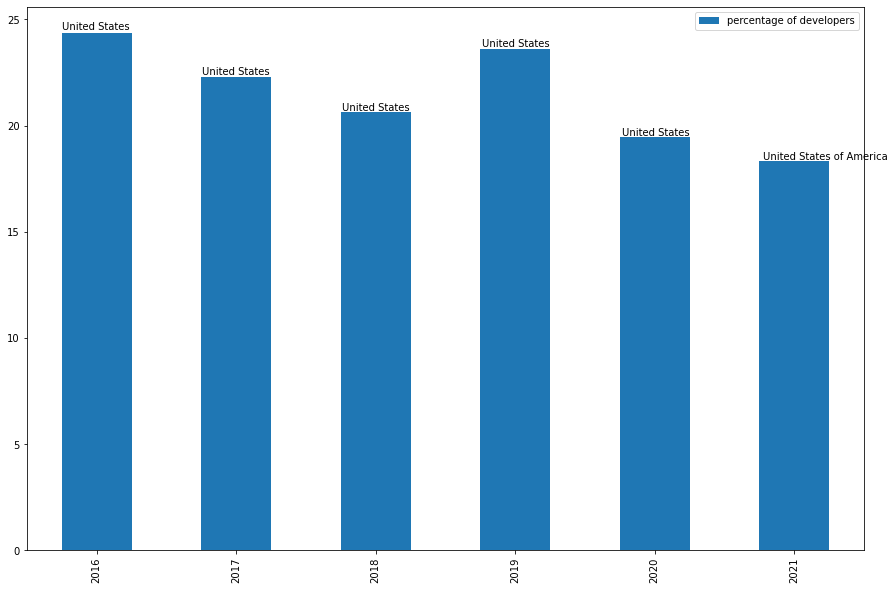

In [13]:
#bar chart to display the country with the most number of developers

most_developers_country_df=pd.DataFrame({'percentage of developers': list(map(lambda x: x[1], most_developers_country_dict.values()))},index=list(most_developers_country_dict.keys()) ) 
ax = most_developers_country_df.plot.bar(figsize=(15,10))#, color=[plt.cm.Paired(np.arange(len(most_developers_country_df)))])
for i, p in enumerate(list(ax.patches)):
    ax.annotate(str(list(map(lambda x: x[0], most_developers_country_dict.values()))[i]), (p.get_x() * 1.005, p.get_height() * 1.005))
    
    
    
    

From the above graph we can see that the united states is the country with most developers in the last 6 years.

## Finding the percentage of males and females between 2019-2022

<AxesSubplot:xlabel='year'>

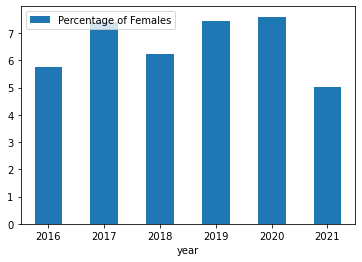

In [14]:
females_16 = df_2016['gender'].value_counts()['Female']/df_2016['gender'].count() * 100
females_17 = df_2017['Gender'].value_counts()['Female']/df_2017['Gender'].count() * 100
females_18 = df_2018['Gender'].value_counts()['Female']/df_2018['Gender'].count() * 100
females_19 = df_2019['Gender'].value_counts()['Woman']/df_2019['Gender'].count() * 100
females_20 = df_2020['Gender'].value_counts()['Woman']/df_2020['Gender'].count() * 100
females_21 = df_2021['Gender'].value_counts()['Woman']/df_2021['Gender'].count() * 100

female_growth_df = pd.DataFrame({'year': ['2016', '2017', '2018', '2019', '2020', '2021'], 'Percentage of Females':[females_16, females_17, females_18, females_19, females_20, females_21]})
female_growth_df.plot.bar(x='year', y='Percentage of Females', rot = 0)

<AxesSubplot:xlabel='year'>

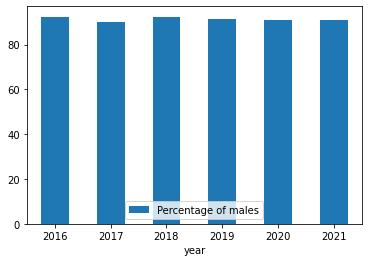

In [15]:
males_16 = df_2016['gender'].value_counts()['Male']/df_2016['gender'].count() * 100
males_17 = df_2017['Gender'].value_counts()['Male']/df_2017['Gender'].count() * 100
males_18 = df_2018['Gender'].value_counts()['Male']/df_2018['Gender'].count() * 100
males_19 = df_2019['Gender'].value_counts()['Man']/df_2019['Gender'].count() * 100
males_20 = df_2020['Gender'].value_counts()['Man']/df_2020['Gender'].count() * 100
males_21 = df_2021['Gender'].value_counts()['Man']/df_2021['Gender'].count() * 100

male_growth_df = pd.DataFrame({'year': ['2016', '2017', '2018', '2019', '2020', '2021'], 'Percentage of males':[males_16, males_17, males_18, males_19, males_20, males_21]})
male_growth_df.plot.bar(x='year', y='Percentage of males', rot = 0)

As we can see from the plots above the growth of males in the industry is very stable, where for the percentage of females in the industry is very low (below 10%) and not growing every year as the latest year(2021) the percentage of women is the lowest compared to the previous 5 years.

In [21]:
def find_most_popular_language(input_value, rows):
    super_dict = collections.defaultdict(int)
    
    try:
        for series in input_value:
            for key in series.to_dict():
                super_dict[key.lower()] += series[key]
    except:
        for languages in input_value:
            if not pd.isnull(languages):
                list_languages = languages.split(';')
                for val in list_languages:
                    super_dict[val.lower()] += 1
    return max(super_dict, key=super_dict.get), max(super_dict.values())/rows * 100

In [25]:
most_popular_language_16 = find_most_popular_language(df_2016['tech_do'], df_2016.shape[0])
most_popular_language_17 = find_most_popular_language(df_2017['HaveWorkedLanguage'], df_2017.shape[0])
most_popular_language_18 = find_most_popular_language(df_2018['LanguageWorkedWith'], df_2018.shape[0])
most_popular_language_19 = find_most_popular_language(df_2019['LanguageWorkedWith'], df_2019.shape[0])
most_popular_language_20 = find_most_popular_language(df_2020['LanguageWorkedWith'], df_2020.shape[0])
most_popular_language_21 = find_most_popular_language(df_2021['LanguageHaveWorkedWith'], df_2021.shape[0])

print(most_popular_language_16,
     most_popular_language_17,
     most_popular_language_18,
     most_popular_language_19,
     most_popular_language_20,
     most_popular_language_21
     )

most_popular_language_dict = {
    '2016': most_popular_language_16,
    '2017': most_popular_language_17,
    '2018': most_popular_language_18,
    '2019': most_popular_language_19,
    '2020': most_popular_language_20,
    '2021': most_popular_language_21
}

(' javascript', 40.34624308406211) (' sql', 35.93166251556663) ('javascript', 55.319407212584096) ('javascript', 66.62578895851851) ('javascript', 60.2255627433642) ('javascript', 64.22296528002492)


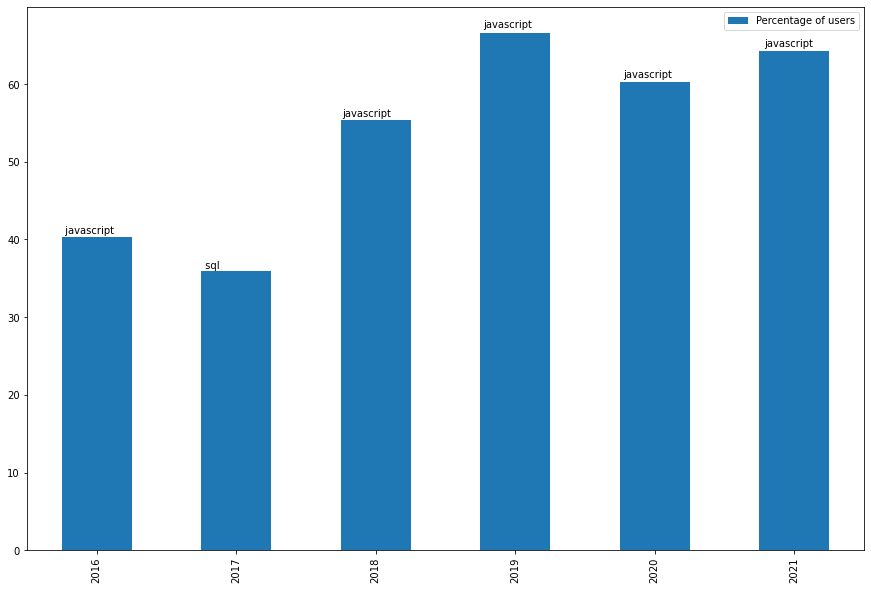

In [30]:
#Plot

df = pd.DataFrame({'Percentage of users': list(map(lambda x: x[1], most_popular_language_dict.values()))}, index = list(most_popular_language_dict.keys()))
ax = df.plot.bar(figsize=(15,10))#, color=[plt.cm.Paired(np.arange(len(df)))])
for i, p in enumerate(list(ax.patches)):
    ax.annotate(str(list(map(lambda x: x[0], most_popular_language_dict.values()))[i]), (p.get_x() * 1.007, p.get_height() * 1.01))

From the graph above we can see that the most popular language in the last four year has been javascript, with percentages over 50% of developers using it.